In [49]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

In [50]:
# have our dataset
X = tf.range(-100, 100, 2)
y = tf.add(X,X)

(100, 100)

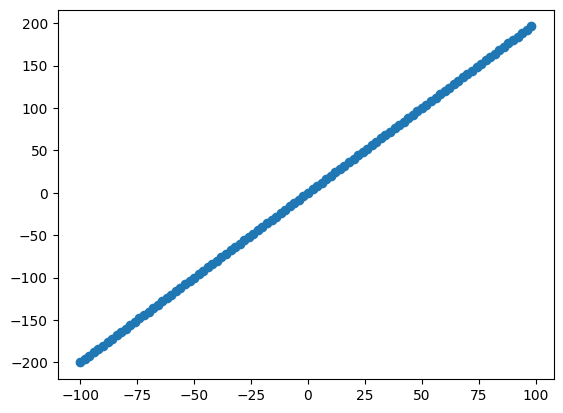

In [51]:
# X.shape, y.shape
plt.scatter(X,y)
len(X), len(y)

In [52]:
# split the training and the testing dataset

X_train = X[:80]
y_train = y[:80]

X_test = X[80:]
y_test = y[80:]

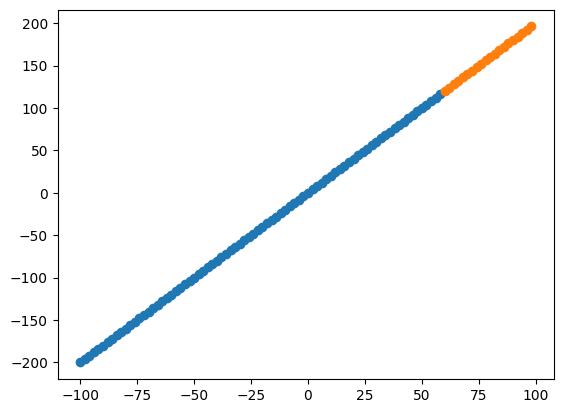

In [53]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

In [54]:
# create a model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=[1]),
        tf.keras.layers.Dense(1)
    ]
)

# compile the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss= tf.keras.losses.mae,
    metrics=["mse"]
)

# fit the model
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
3/3 [==============================] - 1s 5ms/step - loss: 59.7392 - mse: 5636.3975
Epoch 2/200
3/3 [==============================] - 0s 6ms/step - loss: 46.7417 - mse: 3561.9204
Epoch 3/200
3/3 [==============================] - 0s 5ms/step - loss: 32.7466 - mse: 2152.6685
Epoch 4/200
3/3 [==============================] - 0s 5ms/step - loss: 35.3985 - mse: 2058.1582
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 41.7979 - mse: 3791.5586
Epoch 6/200
3/3 [==============================] - 0s 5ms/step - loss: 38.5699 - mse: 2948.8650
Epoch 7/200
3/3 [==============================] - 0s 5ms/step - loss: 27.2804 - mse: 1830.3035
Epoch 8/200
3/3 [==============================] - 0s 6ms/step - loss: 42.7718 - mse: 3110.3958
Epoch 9/200
3/3 [==============================] - 0s 6ms/step - loss: 38.5783 - mse: 2592.3730
Epoch 10/200
3/3 [==============================] - 0s 5ms/step - loss: 37.2164 - mse: 2679.3823
Epoch 11/200
3/3 [=====================

In [55]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 100ms/step


In [56]:
y_test.shape

TensorShape([20])

In [57]:
y_pred = tf.squeeze(y_pred)

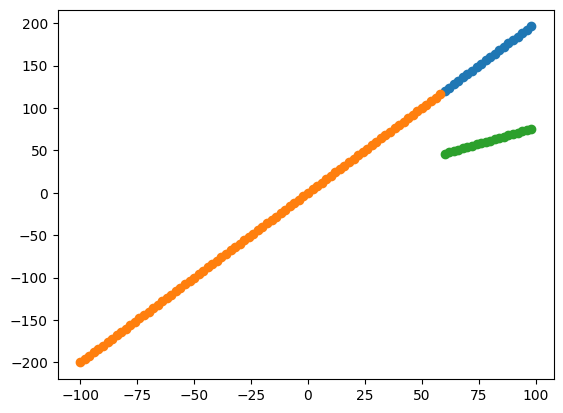

In [58]:
plt.scatter(X_test, y_test)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_pred)

In [59]:
mae = tf.metrics.mean_squared_error(y_test, y_pred)
mse = tf.metrics.mean_absolute_error(y_test, y_pred)

mae.numpy(), mse.numpy()

(9643.217, 97.17368)